<a href="https://colab.research.google.com/github/Yogananth-r/detection-of-leukemia/blob/main/Detection_Of_Leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dependencies

In [1]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Google Drive Auth

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Download data from Drive

In [3]:
download = drive.CreateFile({'id': '1i7OMl1tCPlg8bqa9vDi3glgxhE4f8gdo'})
download.GetContentFile('Dataset.zip')

In [4]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/ALL_IDB1/
  inflating: Dataset/ALL_IDB1/readme_ALL_IDB1.txt  
   creating: Dataset/ALL_IDB1/xyc/
  inflating: Dataset/ALL_IDB1/xyc/Im001_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im002_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im003_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im004_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im005_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im006_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im007_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im008_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im009_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im010_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im011_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im012_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im013_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im014_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im015_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im016_1.xyc  
  inflating: Dataset/ALL_IDB1/xyc/Im017_1.xyc  
  inflating: Dataset/A

In [5]:
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import sys
from sklearn.neighbors import KNeighborsClassifier

In [6]:
%matplotlib inline

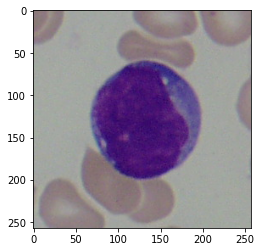

In [7]:
im = Image.open('/content/Dataset/Single Cell/Blast/Im001_1.tif')
plt.imshow(im)

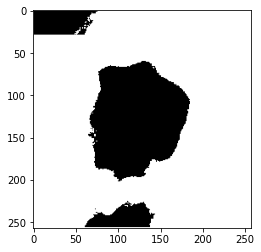

In [8]:
im = Image.open('/content/Dataset/Single Cell/Im001_1.png')
plt.imshow(im, cmap='gray')

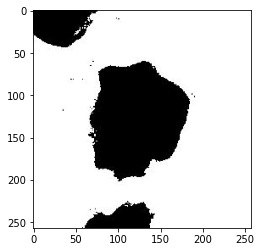

In [9]:
im = Image.open('/content/Dataset/Single Cell/binary.jpg')
plt.imshow(im, cmap='gray')

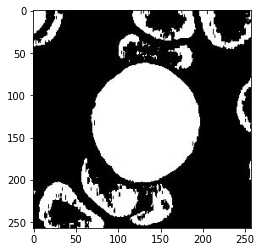

In [10]:
im = Image.open('/content/Dataset/Single Cell/reverse.jpg')
plt.imshow(im, cmap='gray')

In [11]:
affected_cell = '/content/Dataset/Single Cell/Blast/Im001_1.tif'

In [12]:
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Areas = []
Perimeters = []
Circularities = []
Labels = []

initPath="/content/Dataset/Single Cell/Blast/Im"


In [13]:
for i in range(100):
    path = initPath
    if(i+1 < 10):
        path += "00"
    elif(i+1 < 100):
        path += "0"
    path += str(i+1)
    path += "_1.tif"
    im = cv2.imread(path)

    print(path)
    im = Image.open(path)

    imarr = np.copy(asarray(im.split()[0]))

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    imarr = clahe.apply(imarr)

    thresh = 130

    n = len(imarr)

    m = len(imarr[0])

    for i in range (imarr.shape[0]):
        for j in range (imarr.shape[1]):
            if(imarr[i][j] > thresh):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0


    bimg = Image.fromarray(imarr)

    # bimg.show()

    wl = 35
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 255):
                    valid = False
                    break
                if (imarr[k][j + wl] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 255):
                    valid = False
                    break
                if (imarr[i + wl][k] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 0


    for i in range(n):
        for j in range(m):
            if(imarr[i][j] == 0):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0




    imarr = cv2.morphologyEx(imarr, cv2.MORPH_CLOSE, (10,10), iterations=3)

    wl = 40
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 0 and i < n - wl):
                    valid = False
                    break
                if (imarr[k][j + wl] == 0 and i < n - wl):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 0 and j < n - wl):
                    valid = False
                    break
                if (imarr[i + wl][k] == 0 and j < n - wl):
                    valid = False
                    break
            if (j == 0 or j == n-1 or j + wl == m - 1):
                valid = True
            if (i == 0 or i == n-1 or i + wl >= n - 1):
                valid = True
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 255

    sys.setrecursionlimit(250000)

    # def baseCase(i, j, visited):
    #     return (i>=n or j >= m or i < 0 or j < 0 or (i,j) in visited)


    # def areaCalc(imarr, i, j, visited):
    #     if(baseCase(i, j, visited) or imarr[i][j] == 0):
    #         return 0
    #     visited.append((i,j))
    #     return 1 + areaCalc(imarr, i-1, j, visited) + areaCalc(imarr, i+1, j, visited) + areaCalc(imarr, i, j-1, visited) + areaCalc(imarr, i, j+1, visited)
    
    # visited = []

    

    imarr = cv2.morphologyEx(imarr, cv2.MORPH_OPEN, (10,10), iterations=5)

    cleanimg = Image.fromarray(imarr)

    # cleanimg.show()
    
    # print(areaCalc(imarr, n//2, m//2, visited))

    def getArea(contours):
        maxArea = 0
        idx = 0
        for i in range(0, len(contours)):
            area = cv2.contourArea(contours[i])
            if area > maxArea:
                maxArea = area
                idx = i
        maxPerimeter = len(np.array(contours[idx]))
        return maxArea, maxPerimeter

    # image_src = cv2.imread("input.png")
    # imarr = cv2.cvtColor(imarr, cv2.COLOR_BGR2GRAY)
    ret, res = cv2.threshold(imarr, 250,255,0)

    contours = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    print(getArea(contours))

    area, perimeter = getArea(contours)

    print(area, perimeter)

    circularity = 4 * math.pi * area / (perimeter * perimeter)

    Areas.append(area)
    Perimeters.append(perimeter)
    Circularities.append(circularity)
    Labels.append(1)


/content/Dataset/Single Cell/Blast/Im001_1.tif
(13504.0, 187)
13504.0 187
/content/Dataset/Single Cell/Blast/Im002_1.tif
(10513.0, 217)
10513.0 217
/content/Dataset/Single Cell/Blast/Im003_1.tif
(8487.0, 192)
8487.0 192
/content/Dataset/Single Cell/Blast/Im004_1.tif
(8511.5, 206)
8511.5 206
/content/Dataset/Single Cell/Blast/Im005_1.tif
(8586.0, 184)
8586.0 184
/content/Dataset/Single Cell/Blast/Im006_1.tif
(9063.0, 149)
9063.0 149
/content/Dataset/Single Cell/Blast/Im007_1.tif
(9276.0, 229)
9276.0 229
/content/Dataset/Single Cell/Blast/Im008_1.tif
(8692.0, 175)
8692.0 175
/content/Dataset/Single Cell/Blast/Im009_1.tif
(12022.0, 241)
12022.0 241
/content/Dataset/Single Cell/Blast/Im010_1.tif
(9276.5, 234)
9276.5 234
/content/Dataset/Single Cell/Blast/Im011_1.tif
(8531.0, 198)
8531.0 198
/content/Dataset/Single Cell/Blast/Im012_1.tif
(12260.0, 256)
12260.0 256
/content/Dataset/Single Cell/Blast/Im013_1.tif
(8350.0, 148)
8350.0 148
/content/Dataset/Single Cell/Blast/Im014_1.tif
(9887.5, 

In [14]:
for i in range(131, 231):
    path = "/content/Dataset/Single Cell/Healthy/Im"
    path += str(i)
    path += "_0.tif"
    im = cv2.imread(path)

    im = Image.open(path)
    print(path)

    imarr = np.copy(asarray(im.split()[0]))

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    imarr = clahe.apply(imarr)

    thresh = 130

    n = len(imarr)

    m = len(imarr[0])

    for i in range (imarr.shape[0]):
        for j in range (imarr.shape[1]):
            if(imarr[i][j] > thresh):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0


    bimg = Image.fromarray(imarr)

    # bimg.show()

    wl = 35
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 255):
                    valid = False
                    break
                if (imarr[k][j + wl] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 255):
                    valid = False
                    break
                if (imarr[i + wl][k] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 0


    for i in range(n):
        for j in range(m):
            if(imarr[i][j] == 0):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0




    imarr = cv2.morphologyEx(imarr, cv2.MORPH_CLOSE, (10,10), iterations=3)

    wl = 40
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 0 and i < n - wl):
                    valid = False
                    break
                if (imarr[k][j + wl] == 0 and i < n - wl):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 0 and j < n - wl):
                    valid = False
                    break
                if (imarr[i + wl][k] == 0 and j < n - wl):
                    valid = False
                    break
            if (j == 0 or j == n-1 or j + wl == m - 1):
                valid = True
            if (i == 0 or i == n-1 or i + wl >= n - 1):
                valid = True
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 255


    imarr = cv2.morphologyEx(imarr, cv2.MORPH_OPEN, (10,10), iterations=5)

    cleanimg = Image.fromarray(imarr)

    # cleanimg.show()
    
    # print(areaCalc(imarr, n//2, m//2, visited))

    def getArea(contours):
        maxArea = 0
        idx = 0
        for i in range(0, len(contours)):
            area = cv2.contourArea(contours[i])
            if area > maxArea:
                maxArea = area
                idx = i
        maxPerimeter = len(np.array(contours[idx]))
        return maxArea, maxPerimeter

    # image_src = cv2.imread("input.png")
    # imarr = cv2.cvtColor(imarr, cv2.COLOR_BGR2GRAY)
    ret, res = cv2.threshold(imarr, 250,255,0)

    contours = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    print(getArea(contours))

    area, perimeter = getArea(contours)

    print(area, perimeter)

    circularity = 4 * math.pi * area / (perimeter * perimeter)

    Areas.append(area)
    Perimeters.append(perimeter)
    Circularities.append(circularity)
    Labels.append(0)

/content/Dataset/Single Cell/Healthy/Im131_0.tif
(5996.0, 271)
5996.0 271
/content/Dataset/Single Cell/Healthy/Im132_0.tif
(6091.0, 218)
6091.0 218
/content/Dataset/Single Cell/Healthy/Im133_0.tif
(9267.5, 227)
9267.5 227
/content/Dataset/Single Cell/Healthy/Im134_0.tif
(7881.5, 200)
7881.5 200
/content/Dataset/Single Cell/Healthy/Im135_0.tif
(2941.5, 132)
2941.5 132
/content/Dataset/Single Cell/Healthy/Im136_0.tif
(6095.5, 240)
6095.5 240
/content/Dataset/Single Cell/Healthy/Im137_0.tif
(7658.0, 164)
7658.0 164
/content/Dataset/Single Cell/Healthy/Im138_0.tif
(8229.0, 187)
8229.0 187
/content/Dataset/Single Cell/Healthy/Im139_0.tif
(9131.0, 506)
9131.0 506
/content/Dataset/Single Cell/Healthy/Im140_0.tif
(6001.5, 139)
6001.5 139
/content/Dataset/Single Cell/Healthy/Im141_0.tif
(3112.5, 167)
3112.5 167
/content/Dataset/Single Cell/Healthy/Im142_0.tif
(5154.0, 134)
5154.0 134
/content/Dataset/Single Cell/Healthy/Im143_0.tif
(4749.0, 213)
4749.0 213
/content/Dataset/Single Cell/Healthy/I

In [15]:
features = list(zip(Areas, Perimeters, Circularities))

model = KNeighborsClassifier(n_neighbors=3)

# model = MLPClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))


# Train the model using the training sets
model.fit(features,Labels)

KNeighborsClassifier(n_neighbors=3)

In [16]:

# TESTING

trials = 0

success = 0

trialsblast = 0

trialshealthy = 0

successblast = 0

successhealthy = 0

for i in range(101, 121):
    path = initPath
    if(i+1 < 10):
        path += "00"
    elif(i+1 < 100):
        path += "0"
    path += str(i+1)
    path += "_1.tif"
    im = cv2.imread(path)

    im = Image.open(path)
    print(path)

    imarr = np.copy(asarray(im.split()[0]))

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    imarr = clahe.apply(imarr)

    thresh = 130

    n = len(imarr)

    m = len(imarr[0])

    for i in range (imarr.shape[0]):
        for j in range (imarr.shape[1]):
            if(imarr[i][j] > thresh):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0


    bimg = Image.fromarray(imarr)

    # bimg.show()

    wl = 35
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 255):
                    valid = False
                    break
                if (imarr[k][j + wl] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 255):
                    valid = False
                    break
                if (imarr[i + wl][k] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 0


    for i in range(n):
        for j in range(m):
            if(imarr[i][j] == 0):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0




    imarr = cv2.morphologyEx(imarr, cv2.MORPH_CLOSE, (10,10), iterations=3)

    wl = 40
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 0 and i < n - wl):
                    valid = False
                    break
                if (imarr[k][j + wl] == 0 and i < n - wl):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 0 and j < n - wl):
                    valid = False
                    break
                if (imarr[i + wl][k] == 0 and j < n - wl):
                    valid = False
                    break
            if (j == 0 or j == n-1 or j + wl == m - 1):
                valid = True
            if (i == 0 or i == n-1 or i + wl >= n - 1):
                valid = True
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 255

    sys.setrecursionlimit(250000)

    # def baseCase(i, j, visited):
    #     return (i>=n or j >= m or i < 0 or j < 0 or (i,j) in visited)


    # def areaCalc(imarr, i, j, visited):
    #     if(baseCase(i, j, visited) or imarr[i][j] == 0):
    #         return 0
    #     visited.append((i,j))
    #     return 1 + areaCalc(imarr, i-1, j, visited) + areaCalc(imarr, i+1, j, visited) + areaCalc(imarr, i, j-1, visited) + areaCalc(imarr, i, j+1, visited)
    
    # visited = []

    

    imarr = cv2.morphologyEx(imarr, cv2.MORPH_OPEN, (10,10), iterations=5)

    cleanimg = Image.fromarray(imarr)

    # cleanimg.show()
    
    # print(areaCalc(imarr, n//2, m//2, visited))

    def getArea(contours):
        maxArea = 0
        idx = 0
        for i in range(0, len(contours)):
            area = cv2.contourArea(contours[i])
            if area > maxArea:
                maxArea = area
                idx = i
        maxPerimeter = len(np.array(contours[idx]))
        return maxArea, maxPerimeter

    # image_src = cv2.imread("input.png")
    # imarr = cv2.cvtColor(imarr, cv2.COLOR_BGR2GRAY)
    ret, res = cv2.threshold(imarr, 250,255,0)

    contours = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    print(getArea(contours))

    area, perimeter = getArea(contours)

    print(area, perimeter)

    circularity = 4 * math.pi * area / (perimeter * perimeter)

    predicted= model.predict([[area,perimeter,circularity]])
    print(predicted)

    trials += 1
    trialsblast += 1

    if(predicted[0] == 1):
        success += 1
        successblast += 1
    
for i in range(240, 260):
    path = "/content/Dataset/Single Cell/Healthy/Im"
    if(i+1 < 10):
        path += "00"
    elif(i+1 < 100):
        path += "0"
    path += str(i+1)
    path += "_0.tif"
    im = cv2.imread(path)

    im = Image.open(path)
    print(path)

    imarr = np.copy(asarray(im.split()[0]))

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    imarr = clahe.apply(imarr)

    thresh = 130

    n = len(imarr)

    m = len(imarr[0])

    for i in range (imarr.shape[0]):
        for j in range (imarr.shape[1]):
            if(imarr[i][j] > thresh):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0


    bimg = Image.fromarray(imarr)

    # bimg.show()

    wl = 35
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 255):
                    valid = False
                    break
                if (imarr[k][j + wl] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 255):
                    valid = False
                    break
                if (imarr[i + wl][k] == 255):
                    valid = False
                    break
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 0


    for i in range(n):
        for j in range(m):
            if(imarr[i][j] == 0):
                imarr[i][j] = 255
            else:
                imarr[i][j] = 0




    imarr = cv2.morphologyEx(imarr, cv2.MORPH_CLOSE, (10,10), iterations=3)

    wl = 40
    for i in range(n - wl):
        for j in range(m - wl):
            valid = True
            for k in range (i, i + wl):
                if (imarr[k][j] == 0 and i < n - wl):
                    valid = False
                    break
                if (imarr[k][j + wl] == 0 and i < n - wl):
                    valid = False
                    break
            if (valid == False):
                continue
            for k in range (j, j + wl):
                if (imarr[i][k] == 0 and j < n - wl):
                    valid = False
                    break
                if (imarr[i + wl][k] == 0 and j < n - wl):
                    valid = False
                    break
            if (j == 0 or j == n-1 or j + wl == m - 1):
                valid = True
            if (i == 0 or i == n-1 or i + wl >= n - 1):
                valid = True
            if (valid == False):
                continue
            for x in range(i, i + wl):
                for y in range (j, j + wl):
                    imarr[x][y] = 255

    sys.setrecursionlimit(250000)

    # def baseCase(i, j, visited):
    #     return (i>=n or j >= m or i < 0 or j < 0 or (i,j) in visited)


    # def areaCalc(imarr, i, j, visited):
    #     if(baseCase(i, j, visited) or imarr[i][j] == 0):
    #         return 0
    #     visited.append((i,j))
    #     return 1 + areaCalc(imarr, i-1, j, visited) + areaCalc(imarr, i+1, j, visited) + areaCalc(imarr, i, j-1, visited) + areaCalc(imarr, i, j+1, visited)
    
    # visited = []

    

    imarr = cv2.morphologyEx(imarr, cv2.MORPH_OPEN, (10,10), iterations=5)

    cleanimg = Image.fromarray(imarr)

    # cleanimg.show()
    
    # print(areaCalc(imarr, n//2, m//2, visited))

    def getArea(contours):
        maxArea = 0
        idx = 0
        for i in range(0, len(contours)):
            area = cv2.contourArea(contours[i])
            if area > maxArea:
                maxArea = area
                idx = i
        maxPerimeter = len(np.array(contours[idx]))
        return maxArea, maxPerimeter

    # image_src = cv2.imread("input.png")
    # imarr = cv2.cvtColor(imarr, cv2.COLOR_BGR2GRAY)
    ret, res = cv2.threshold(imarr, 250,255,0)

    contours = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    print(getArea(contours))

    area, perimeter = getArea(contours)

    print(area, perimeter)

    circularity = 4 * math.pi * area / (perimeter * perimeter)

    predicted= model.predict([[area,perimeter,circularity]])
    print(predicted)

    trials += 1
    trialshealthy += 1

    if(predicted[0] == 0):
        success += 1
        successhealthy += 1


# #Predict Output
# predicted= model.predict([[area,perimeter,circularity]])
# print(predicted)

accuracy = success / trials

accuracyblast = successblast / trialsblast

accuracyhealthy = successhealthy / trialshealthy

print("The total accuracy is: ", accuracy)

print("Blast cells are detected at an accuracy rate of: ", accuracyblast)

print("Healthy cells are detected at an accuracy rate of: ", accuracyhealthy)

/content/Dataset/Single Cell/Blast/Im102_1.tif
(12774.5, 234)
12774.5 234
[1]
/content/Dataset/Single Cell/Blast/Im103_1.tif
(13570.0, 255)
13570.0 255
[1]
/content/Dataset/Single Cell/Blast/Im104_1.tif
(16420.5, 250)
16420.5 250
[1]
/content/Dataset/Single Cell/Blast/Im105_1.tif
(10348.0, 194)
10348.0 194
[1]
/content/Dataset/Single Cell/Blast/Im106_1.tif
(15857.5, 338)
15857.5 338
[1]
/content/Dataset/Single Cell/Blast/Im107_1.tif
(8072.0, 162)
8072.0 162
[1]
/content/Dataset/Single Cell/Blast/Im108_1.tif
(8091.5, 741)
8091.5 741
[1]
/content/Dataset/Single Cell/Blast/Im109_1.tif
(17906.5, 279)
17906.5 279
[1]
/content/Dataset/Single Cell/Blast/Im110_1.tif
(16694.5, 260)
16694.5 260
[1]
/content/Dataset/Single Cell/Blast/Im111_1.tif
(9350.5, 577)
9350.5 577
[0]
/content/Dataset/Single Cell/Blast/Im112_1.tif
(8882.5, 291)
8882.5 291
[0]
/content/Dataset/Single Cell/Blast/Im113_1.tif
(8075.0, 214)
8075.0 214
[1]
/content/Dataset/Single Cell/Blast/Im114_1.tif
(7787.5, 153)
7787.5 153
[0

In [17]:
def predictCell(path):
  im = cv2.imread(path)

  im = Image.open(path)
  print(path)

  imarr = np.copy(asarray(im.split()[0]))

  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

  imarr = clahe.apply(imarr)

  thresh = 130

  n = len(imarr)

  m = len(imarr[0])

  for i in range (imarr.shape[0]):
      for j in range (imarr.shape[1]):
          if(imarr[i][j] > thresh):
              imarr[i][j] = 255
          else:
              imarr[i][j] = 0


  bimg = Image.fromarray(imarr)

  # bimg.show()

  wl = 35
  for i in range(n - wl):
      for j in range(m - wl):
          valid = True
          for k in range (i, i + wl):
              if (imarr[k][j] == 255):
                  valid = False
                  break
              if (imarr[k][j + wl] == 255):
                  valid = False
                  break
          if (valid == False):
              continue
          for k in range (j, j + wl):
              if (imarr[i][k] == 255):
                  valid = False
                  break
              if (imarr[i + wl][k] == 255):
                  valid = False
                  break
          if (valid == False):
              continue
          for x in range(i, i + wl):
              for y in range (j, j + wl):
                  imarr[x][y] = 0

  for i in range(n):
      for j in range(m):
          if(imarr[i][j] == 0):
              imarr[i][j] = 255
          else:
              imarr[i][j] = 0


  imarr = cv2.morphologyEx(imarr, cv2.MORPH_CLOSE, (10,10), iterations=3)

  wl = 40
  for i in range(n - wl):
      for j in range(m - wl):
          valid = True
          for k in range (i, i + wl):
              if (imarr[k][j] == 0 and i < n - wl):
                  valid = False
                  break
              if (imarr[k][j + wl] == 0 and i < n - wl):
                  valid = False
                  break
          if (valid == False):
              continue
          for k in range (j, j + wl):
              if (imarr[i][k] == 0 and j < n - wl):
                  valid = False
                  break
              if (imarr[i + wl][k] == 0 and j < n - wl):
                  valid = False
                  break
          if (j == 0 or j == n-1 or j + wl == m - 1):
              valid = True
          if (i == 0 or i == n-1 or i + wl >= n - 1):
              valid = True
          if (valid == False):
              continue
          for x in range(i, i + wl):
              for y in range (j, j + wl):
                  imarr[x][y] = 255

  sys.setrecursionlimit(250000)

      # def baseCase(i, j, visited):
      #     return (i>=n or j >= m or i < 0 or j < 0 or (i,j) in visited)


      # def areaCalc(imarr, i, j, visited):
      #     if(baseCase(i, j, visited) or imarr[i][j] == 0):
      #         return 0
      #     visited.append((i,j))
      #     return 1 + areaCalc(imarr, i-1, j, visited) + areaCalc(imarr, i+1, j, visited) + areaCalc(imarr, i, j-1, visited) + areaCalc(imarr, i, j+1, visited)
      
      # visited = []

      

  imarr = cv2.morphologyEx(imarr, cv2.MORPH_OPEN, (10,10), iterations=5)

  cleanimg = Image.fromarray(imarr)

      # cleanimg.show()
      
      # print(areaCalc(imarr, n//2, m//2, visited))

  def getArea(contours):
      maxArea = 0
      idx = 0
      for i in range(0, len(contours)):
          area = cv2.contourArea(contours[i])
          if area > maxArea:
              maxArea = area
              idx = i
      maxPerimeter = len(np.array(contours[idx]))
      return maxArea, maxPerimeter

      # image_src = cv2.imread("input.png")
      # imarr = cv2.cvtColor(imarr, cv2.COLOR_BGR2GRAY)
  ret, res = cv2.threshold(imarr, 250,255,0)

  contours = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

  print(getArea(contours))

  area, perimeter = getArea(contours)

  print(area, perimeter)

  circularity = 4 * math.pi * area / (perimeter * perimeter)

  predicted= model.predict([[area,perimeter,circularity]])
  print(predicted)
  if(predicted==1):
    print("Blast cell detected")
  elif(predicted==0):
    print("Healthy cell")

In [18]:
path = '/content/Dataset/Single Cell/Healthy/Im'
path += "260_0.tif"
predictCell(path)

/content/Dataset/Single Cell/Healthy/Im260_0.tif
(2090.5, 289)
2090.5 289
[0]
Healthy cell


In [19]:
path = '/content/Dataset/Single Cell/Blast/Im'
path += "125_1.tif"
predictCell(path)

/content/Dataset/Single Cell/Blast/Im125_1.tif
(10851.0, 513)
10851.0 513
[1]
Blast cell detected
